In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C20_ro_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        35.6631 (33.5270, 41.4867) (33.4700, 40.0674)  6.5974 (Jnode 202)\n',
 't_n104        24.7812 (18.8559, 31.4677) (18.5058, 31.0547) 12.5489 (Jnode 201)\n',
 't_n105        23.7476 (18.0581, 30.1754) (17.8130, 29.8761) 12.0631 (Jnode 200)\n',
 't_n106        21.0907 (16.0121, 26.8440) (15.8204, 26.5999) 10.7796 (Jnode 199)\n',
 't_n107        20.4211 (15.5052, 25.9833) (15.3137, 25.7540) 10.4403 (Jnode 198)\n',
 't_n108        19.1982 (14.5642, 24.4435) (14.3892, 24.2178)  9.8286 (Jnode 197)\n',
 't_n109         8.6493 ( 6.3535, 11.3871) ( 6.2052, 11.1903)  4.9852 (Jnode 196)\n',
 't_n110         8.5749 ( 6.2990, 11.2901) ( 6.1203, 11.0673)  4.9470 (Jnode 195)\n',
 't_n111         8.3280 ( 6.1152, 10.9682) ( 5.9213, 10.7328)  4.8115 (Jnode 194)\n',
 't_n112         8.0093 ( 5.8781, 10.5569) ( 5.7353, 10.3720)  4.6367 (Jnode 193)\n',
 't_n113         7.6433 ( 5.6048, 10.0799) ( 5.4848,  9.9196)  4.4348 (Jnode 192)\n',
 't_n114         5.5555 ( 4.0151,  7.4079) ( 3.9373,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[35.6631,
 24.7812,
 23.7476,
 21.0907,
 20.4211,
 19.1982,
 8.6493,
 8.5749,
 8.328,
 8.0093,
 7.6433,
 5.5555,
 3.9581,
 3.0067,
 1.5183,
 5.8893,
 5.0212,
 7.975,
 5.2064,
 7.6384,
 6.1083,
 4.9656,
 4.0568,
 7.3829,
 6.9467,
 1.7992,
 8.2064,
 7.3654,
 5.6363,
 4.4741,
 5.0519,
 4.5967,
 3.8365,
 3.6197,
 17.7772,
 14.1022,
 19.3561,
 17.6381,
 16.4095,
 13.332,
 6.9179,
 12.8285,
 11.2321,
 9.9804,
 8.4439,
 15.8211,
 14.542,
 3.0513,
 1.3119,
 22.1078,
 20.5432,
 18.3673,
 17.8219,
 19.4196,
 12.8151,
 15.8645,
 12.5205,
 24.1084,
 22.621,
 20.4545,
 19.2111,
 16.2254,
 10.8023,
 14.3185,
 20.0478,
 6.0127,
 20.1724,
 12.3391,
 11.9298,
 11.5794,
 10.949,
 10.0064,
 9.5129,
 9.1629,
 8.7544,
 7.7903,
 6.7216,
 5.6504,
 7.9014,
 7.4123,
 5.868,
 6.6929,
 8.5564,
 7.8803,
 7.2825,
 6.3074,
 4.3052,
 8.0576,
 7.2385,
 6.3988,
 9.4801,
 8.9638,
 8.4809,
 7.5128,
 5.4937,
 8.4724,
 4.7483,
 3.759,
 1.368,
 11.8453,
 10.0493]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_ro_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[35.4428,
 26.2957,
 24.708,
 21.78,
 20.8227,
 18.7863,
 9.1136,
 8.9865,
 8.5195,
 8.0529,
 7.5901,
 5.5121,
 3.9087,
 2.861,
 1.6648,
 5.8462,
 4.8028,
 8.0323,
 5.2038,
 7.5886,
 5.9668,
 4.7368,
 4.3,
 7.4433,
 6.8605,
 2.1858,
 8.4189,
 7.4002,
 5.6514,
 4.4458,
 5.1561,
 4.5288,
 3.6605,
 4.0267,
 17.1952,
 13.9494,
 19.4089,
 17.3118,
 15.5703,
 12.6036,
 6.9625,
 12.4279,
 10.4705,
 8.997,
 7.3892,
 15.4958,
 13.8787,
 3.8302,
 1.7469,
 22.0589,
 19.9927,
 17.2617,
 16.9148,
 18.8996,
 12.5646,
 15.4163,
 11.6833,
 25.2414,
 23.2731,
 20.6133,
 18.8796,
 15.9658,
 11.2576,
 13.696,
 20.1225,
 7.5663,
 20.433,
 14.8422,
 13.859,
 13.027,
 12.0391,
 10.783,
 10.0913,
 9.4916,
 8.7602,
 7.5529,
 6.3517,
 5.2382,
 7.7397,
 7.1413,
 5.5927,
 6.0998,
 8.7217,
 7.8006,
 6.9402,
 5.8201,
 4.0176,
 7.9074,
 6.9804,
 5.9702,
 9.8905,
 9.0734,
 8.2366,
 7.0344,
 4.9102,
 8.5153,
 5.785,
 4.4349,
 1.7646,
 14.163,
 11.8534]

In [12]:
posterior_mean_iqtree

[35.6631,
 24.7812,
 23.7476,
 21.0907,
 20.4211,
 19.1982,
 8.6493,
 8.5749,
 8.328,
 8.0093,
 7.6433,
 5.5555,
 3.9581,
 3.0067,
 1.5183,
 5.8893,
 5.0212,
 7.975,
 5.2064,
 7.6384,
 6.1083,
 4.9656,
 4.0568,
 7.3829,
 6.9467,
 1.7992,
 8.2064,
 7.3654,
 5.6363,
 4.4741,
 5.0519,
 4.5967,
 3.8365,
 3.6197,
 17.7772,
 14.1022,
 19.3561,
 17.6381,
 16.4095,
 13.332,
 6.9179,
 12.8285,
 11.2321,
 9.9804,
 8.4439,
 15.8211,
 14.542,
 3.0513,
 1.3119,
 22.1078,
 20.5432,
 18.3673,
 17.8219,
 19.4196,
 12.8151,
 15.8645,
 12.5205,
 24.1084,
 22.621,
 20.4545,
 19.2111,
 16.2254,
 10.8023,
 14.3185,
 20.0478,
 6.0127,
 20.1724,
 12.3391,
 11.9298,
 11.5794,
 10.949,
 10.0064,
 9.5129,
 9.1629,
 8.7544,
 7.7903,
 6.7216,
 5.6504,
 7.9014,
 7.4123,
 5.868,
 6.6929,
 8.5564,
 7.8803,
 7.2825,
 6.3074,
 4.3052,
 8.0576,
 7.2385,
 6.3988,
 9.4801,
 8.9638,
 8.4809,
 7.5128,
 5.4937,
 8.4724,
 4.7483,
 3.759,
 1.368,
 11.8453,
 10.0493]

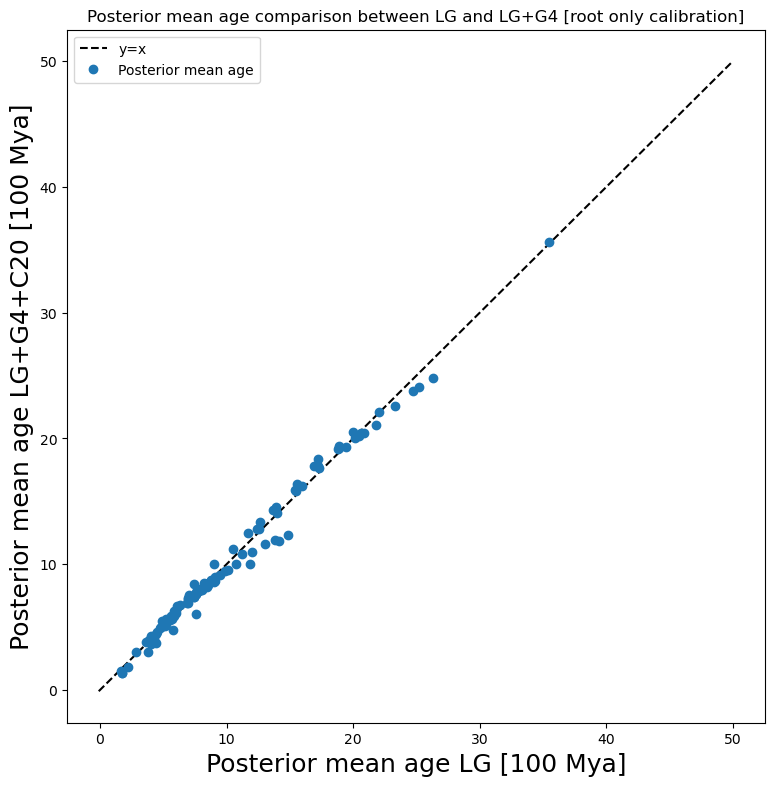

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C20 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [root only calibration]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C20_ro_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')